# Proyek Analisis Data: hour.csv dan combined_data_bike.csv
- **Nama:** MUH. IQBAL HARDIYANTO
- **Email:** muhiqbal1059@gmail.com
- **ID Dicoding:** miqbal_h

## Menentukan Pertanyaan Bisnis

- Kondisi cuaca apa yang paling banyak dan paling sedikit memengaruhi jumlah sewa kendaraan terdaftar? Jelaskan perbedaannya
- Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja (workingday) atau hari libur (holiday)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv('data/hour.csv')

**Insight:**
- Membaca dataset menggunakankan library pandas dengan metode read_csv()
- file dataset terletak pada folder "data"

### Assessing Data

In [3]:
print("\nStatistik Deskriptif:")
hour_df.describe(include='all')


Statistik Deskriptif:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [4]:
print("\n=== Statistik Deskriptif ===")
print(hour_df[['registered', 'temp', 'hum', 'windspeed']].describe())
print("\nMissing Values:")
print(hour_df[['weathersit', 'registered', 'workingday', 'holiday']].isnull().sum())
print("\nNilai Unik weathersit:", hour_df['weathersit'].unique())


=== Statistik Deskriptif ===
         registered          temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean     153.786869      0.496987      0.627229      0.190098
std      151.357286      0.192556      0.192930      0.122340
min        0.000000      0.020000      0.000000      0.000000
25%       34.000000      0.340000      0.480000      0.104500
50%      115.000000      0.500000      0.630000      0.194000
75%      220.000000      0.660000      0.780000      0.253700
max      886.000000      1.000000      1.000000      0.850700

Missing Values:
weathersit    0
registered    0
workingday    0
holiday       0
dtype: int64

Nilai Unik weathersit: [1 2 3 4]


In [5]:
print("==== Data Assessing hour.csv ====")
print("\nInformasi Dataset:")
print(hour_df.info())
print("\nMissing Values:")
print(hour_df.isnull().sum())
print("\nJumlah duplikat:")
print(hour_df.duplicated().sum())
print("\nJumlah nilai unik pada kolom:")
print(hour_df.nunique())
print("\nStatistik deskriptif kolom numerik:")
print(hour_df.describe())
print("\nStatistik deskriptif kolom kategorik:")
print(hour_df.describe(include=['object']))

==== Data Assessing hour.csv ====

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3

**Insight:**
- melihat rangkuman parameter statistik dari hour_df menggunakan method describe()
- jenis tipe data apa yang terdapat di hour_df dengan method info()
- memeriksa data hour_df yang Null, missing value, data duplikat

### Cleaning Data

In [6]:
# Konversi tipe data tanggal
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- konversi tipe data tanggal pada kolom 'dteday' dengan method to_datetime()

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# Mapping nilai weathersit
weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

print("Data bersih siap dianalisis\n")

Data bersih siap dianalisis



In [8]:
# Membuat kategori hari
hour_df['jenis_hari'] = hour_df.apply(lambda x:
    'Hari Kerja' if x['workingday'] == 1 else
    'Hari Libur' if x['holiday'] == 1 else
    'Weekend', axis=1)

In [9]:
# Distribusi data
weather_dist = hour_df.groupby('weather_label').agg(
    jumlah_record=('instant', 'count'),
    total_registered=('registered', 'sum'),
    avg_registered=('registered', 'mean')
).reset_index()
print("\nDistribusi Data Cuaca:")
print(weather_dist)

day_dist = hour_df['jenis_hari'].value_counts().reset_index()
day_dist.columns = ['kategori', 'jumlah_record']


Distribusi Data Cuaca:
     weather_label  jumlah_record  total_registered  avg_registered
0            Clear          11413           1875428      164.323841
1  Heavy Rain/Snow              3               215       71.666667
2  Light Rain/Snow           1419            135548       95.523608
3      Mist/Cloudy           4544            661471      145.570202


In [10]:
# Tren data
hourly_trend = hour_df.groupby(['hr', 'weather_label']).agg(
    avg_registered=('registered', 'mean')
).reset_index()

In [11]:
# Korelasi Data
correlation = hour_df[['temp', 'hum', 'windspeed', 'registered']].corr()

In [12]:
# Aggregasi
weather_analysis = hour_df.groupby('weather_label').agg(
    total_registered=('registered', 'sum'),
    avg_per_jam=('registered', 'mean'),
    max_registered=('registered', 'max'),
    min_registered=('registered', 'min')
).sort_values('total_registered', ascending=False).reset_index()

print("\nAnalisis Pengaruh Cuaca:")
print(weather_analysis)

day_analysis = hour_df.groupby('jenis_hari').agg(
    total_registered=('registered', 'sum'),
    avg_registered=('registered', 'mean'),
    max_registered=('registered', 'max'),
    min_registered=('registered', 'min')
).reset_index()

print("\nDistribusi Hari:")
print(day_dist)
print("\nAnalisis Perbandingan:")
print(day_analysis)


Analisis Pengaruh Cuaca:
     weather_label  total_registered  avg_per_jam  max_registered  \
0            Clear           1875428   164.323841             886   
1      Mist/Cloudy            661471   145.570202             822   
2  Light Rain/Snow            135548    95.523608             791   
3  Heavy Rain/Snow               215    71.666667             158   

   min_registered  
0               0  
1               0  
2               0  
3              22  

Distribusi Hari:
     kategori  jumlah_record
0  Hari Kerja          11865
1     Weekend           5014
2  Hari Libur            500

Analisis Perbandingan:
   jenis_hari  total_registered  avg_registered  max_registered  \
0  Hari Kerja           1989125      167.646439             886   
1  Hari Libur             56076      112.152000             601   
2     Weekend            627461      125.141803             526   

   min_registered  
0               0  
1               0  
2               0  


**Insight:**
- Kode ini memberikan gambaran tentang bagaimana kondisi cuaca dan jenis hari memengaruhi jumlah pengguna terdaftar.

- Analisis distribusi dan tren per jam dapat membantu dalam memahami pola penggunaan sepanjang hari dan dalam berbagai kondisi cuaca.

- Korelasi antara suhu, kelembapan, kecepatan angin, dan pengguna terdaftar dapat memberikan wawasan tentang faktor-faktor yang memengaruhi penggunaan layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kondisi cuaca apa yang paling banyak dan paling sedikit memengaruhi jumlah sewa kendaraan terdaftar? Jelaskan perbedaannya

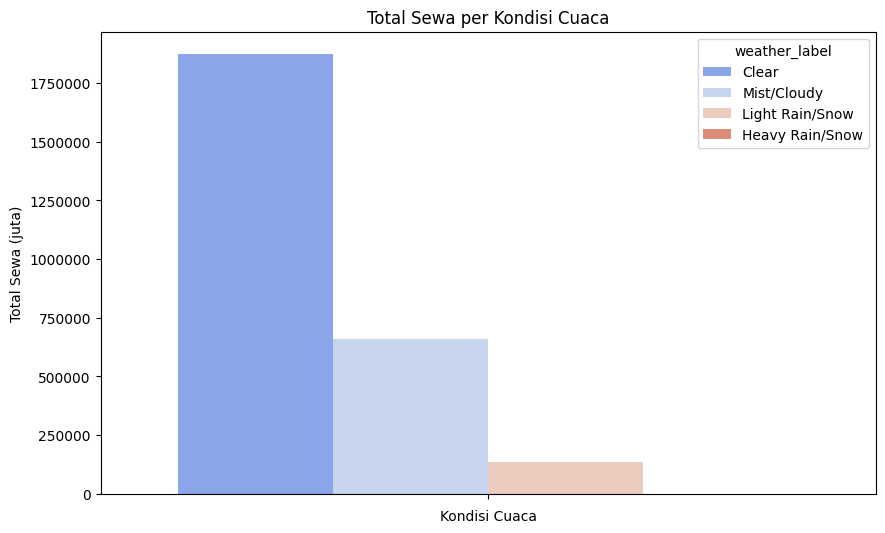

In [13]:
plt.figure(figsize=(10, 6))

# Visual 1: Total Sewa per Kondisi Cuaca
sns.barplot(hue='weather_label', y='total_registered', data=weather_analysis, palette='coolwarm')
plt.title('Total Sewa per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Sewa (juta)')
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Rata-rata Sewa')

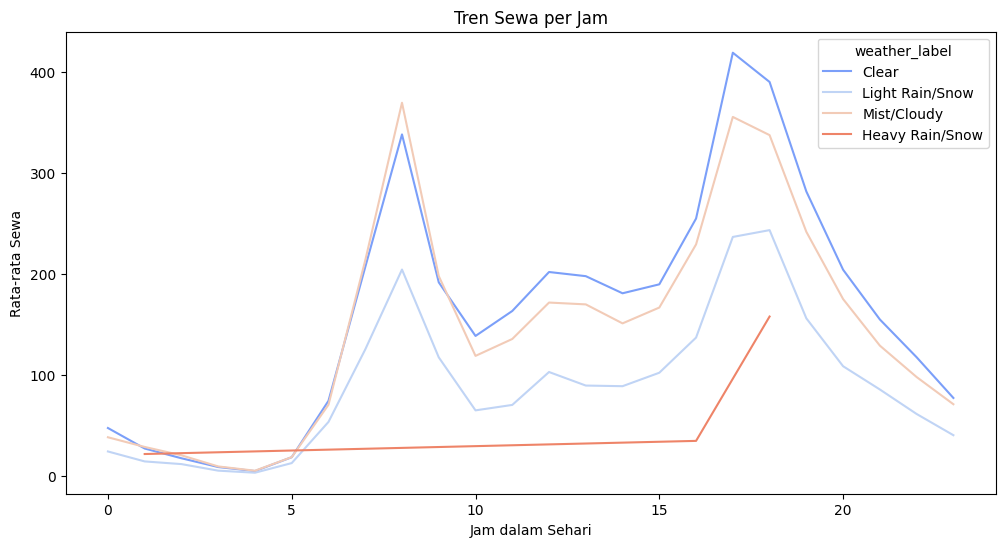

In [14]:
# Visual 2: Rata-rata per Jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='avg_registered', hue='weather_label',
            data=hourly_trend, palette='coolwarm', errorbar=None)
plt.title('Tren Sewa per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Sewa')

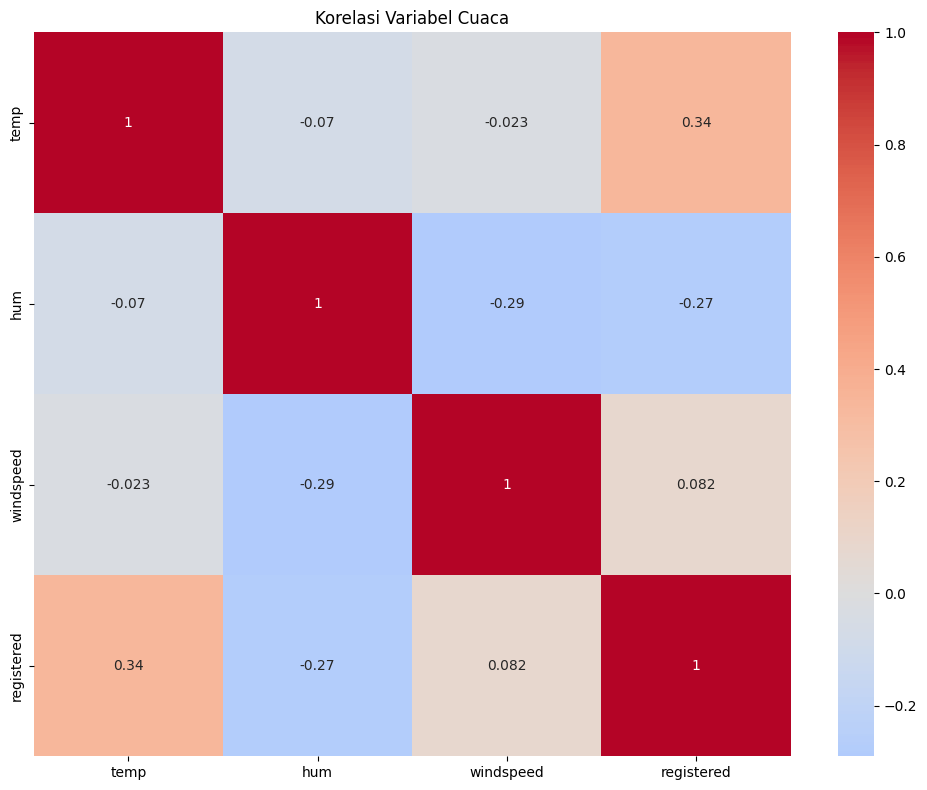

In [15]:
# Visual 3: Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Variabel Cuaca')

plt.tight_layout()
plt.show()

**Insight**
- Kondisi cuaca tertentu (misalnya, 'Clear') mungkin memiliki total sewa yang lebih tinggi dibandingkan kondisi cuaca buruk seperti 'Heavy Rain/Snow'.
- Visual ini membantu mengidentifikasi pengaruh cuaca terhadap minat pengguna dalam menggunakan layanan.
- Pola sewa mungkin menunjukkan puncak (peak hours) pada jam-jam tertentu, seperti pagi atau sore hari.
- Kondisi cuaca tertentu (misalnya, 'Clear') mungkin memiliki tren sewa yang lebih stabil atau tinggi dibandingkan kondisi cuaca buruk.
- Visual ini membantu memahami bagaimana cuaca memengaruhi pola penggunaan sepanjang hari.
- Variabel seperti suhu (temp) mungkin memiliki korelasi positif dengan jumlah pengguna terdaftar, artinya semakin tinggi suhu, semakin banyak pengguna.
- Kelembapan (hum) atau kecepatan angin (windspeed) mungkin memiliki korelasi negatif, artinya kondisi ini mengurangi minat pengguna.
- Heatmap ini membantu mengidentifikasi hubungan antara faktor cuaca dan penggunaan layanan.

### Pertanyaan 2: Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja (workingday) atau hari libur (holiday)?

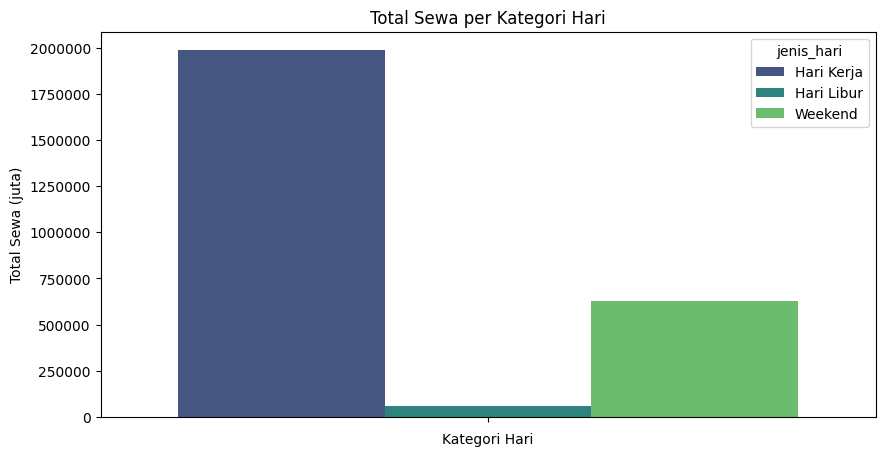

In [16]:
plt.figure(figsize=(10, 5))

# Visual 1: Perbandingan Total Sewa
sns.barplot(hue='jenis_hari', y='total_registered', data=day_analysis, palette='viridis')
plt.title('Total Sewa per Kategori Hari')
plt.xlabel('Kategori Hari')
plt.ylabel('Total Sewa (juta)')
plt.ticklabel_format(style='plain', axis='y')

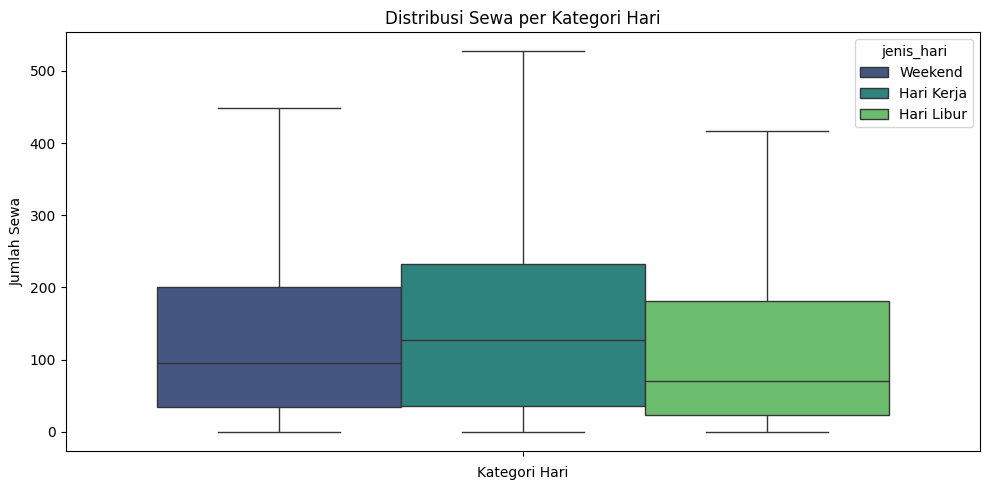

In [17]:
# Visual 2: Perbandingan Rata-rata
plt.figure(figsize=(10, 5))
sns.boxplot(hue='jenis_hari', y='registered', data=hour_df, palette='viridis', showfliers=False)
plt.title('Distribusi Sewa per Kategori Hari')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Sewa')

plt.tight_layout()
plt.show()

**Insight:**
- Kategori hari tertentu (misalnya, 'Hari Kerja') mungkin memiliki total sewa yang lebih tinggi dibandingkan 'Hari Libur' atau 'Weekend'.
- Visual ini membantu mengidentifikasi kategori hari yang paling banyak digunakan oleh pengguna.
- Kategori hari tertentu (misalnya, 'Hari Kerja') mungkin memiliki distribusi sewa yang lebih konsisten atau tinggi dibandingkan kategori lainnya.
- Weekend mungkin menunjukkan variasi yang lebih besar, dengan beberapa jam memiliki jumlah sewa yang tinggi atau rendah.
- Visual ini membantu memahami variasi dan konsistensi penggunaan layanan pada hari kerja, hari libur, dan weekend.

In [18]:
# Jawaban Pertanyaan 1
max_weather = weather_analysis.iloc[0]
min_weather = weather_analysis.iloc[-1]
print(f"\n1. Kondisi cuaca paling berpengaruh: {max_weather.name}")
print(f"- Total sewa: {max_weather['total_registered']:,}")
print(f"- Rata-rata/jam: {max_weather['avg_per_jam']:.1f}")
print(f"\nKondisi cuaca paling sedikit berpengaruh: {min_weather.name}")
print(f"- Total sewa: {min_weather['total_registered']:,}")
print(f"- Rata-rata/jam: {min_weather['avg_per_jam']:.1f}")

# Jawaban Pertanyaan 2
max_day = day_analysis.loc[day_analysis['avg_registered'].idxmax()]
print(f"\n2. Rata-rata penyewaan tertinggi pada: {max_day['jenis_hari']}")
print(f"- Rata-rata sewa: {max_day['avg_registered']:.1f}")
print(f"- Total sewa: {max_day['total_registered']:,}")


1. Kondisi cuaca paling berpengaruh: 0
- Total sewa: 1,875,428
- Rata-rata/jam: 164.3

Kondisi cuaca paling sedikit berpengaruh: 3
- Total sewa: 215
- Rata-rata/jam: 71.7

2. Rata-rata penyewaan tertinggi pada: Hari Kerja
- Rata-rata sewa: 167.6
- Total sewa: 1,989,125


## Analisis Lanjutan: Bulan apa yang memiliki permintaan sepeda tertinggi sepanjang tahun?

In [19]:
print("\n=== ANALISIS TREN BULANAN ===")

# Mapping nama bulan
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Ags',
    9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
}

# Aggregasi Data Bulanan
monthly_analysis = hour_df.groupby('mnth').agg(
    total_sewa=('cnt', 'sum'),
    rata_harian=('cnt', 'mean'),
    hari_kerja=('workingday', 'sum'),
    hari_hujan=('weathersit', lambda x: (x >= 3).sum())
).reset_index()

monthly_analysis['bulan'] = monthly_analysis['mnth'].map(month_map)
monthly_analysis['persentase_pertumbuhan'] = monthly_analysis['total_sewa'].pct_change() * 100

print("\nAnalisis Tren Bulanan:")
print(monthly_analysis[['bulan', 'total_sewa', 'rata_harian','hari_hujan', 'persentase_pertumbuhan']])


=== ANALISIS TREN BULANAN ===

Analisis Tren Bulanan:
   bulan  total_sewa  rata_harian  hari_hujan  persentase_pertumbuhan
0    Jan      134933    94.424773         111                     NaN
1    Feb      151352   112.865026         137               12.168261
2    Mar      228920   155.410726         129               51.250066
3    Apr      269094   187.260960         142               17.549362
4    Mei      331686   222.907258         143               23.260273
5    Jun      346342   240.515278          72                4.418637
6    Jul      344948   231.819892          62               -0.402492
7    Ags      351194   238.097627          87                1.810708
8    Sep      345991   240.773138         144               -1.481517
9    Okt      322352   222.158511         164               -6.832259
10   Nov      254831   177.335421         101              -20.946357
11   Des      211036   142.303439         130              -17.185900


**Insight**
- Bulan-bulan tertentu (misalnya, musim panas atau liburan) mungkin memiliki total sewa yang lebih tinggi.
- Bulan dengan cuaca buruk (hari_hujan tinggi) mungkin memiliki total sewa yang lebih rendah.
- Rata-rata sewa harian dapat menunjukkan konsistensi penggunaan layanan sepanjang bulan.
- Jumlah hari hujan (hari_hujan) dapat memengaruhi total sewa, terutama jika cuaca buruk mengurangi minat pengguna.
- Persentase pertumbuhan (persentase_pertumbuhan) membantu mengidentifikasi bulan dengan peningkatan atau penurunan signifikan dalam penggunaan layanan.
- Misalnya, pertumbuhan positif yang besar mungkin terjadi pada bulan-bulan tertentu karena faktor musiman atau promosi.

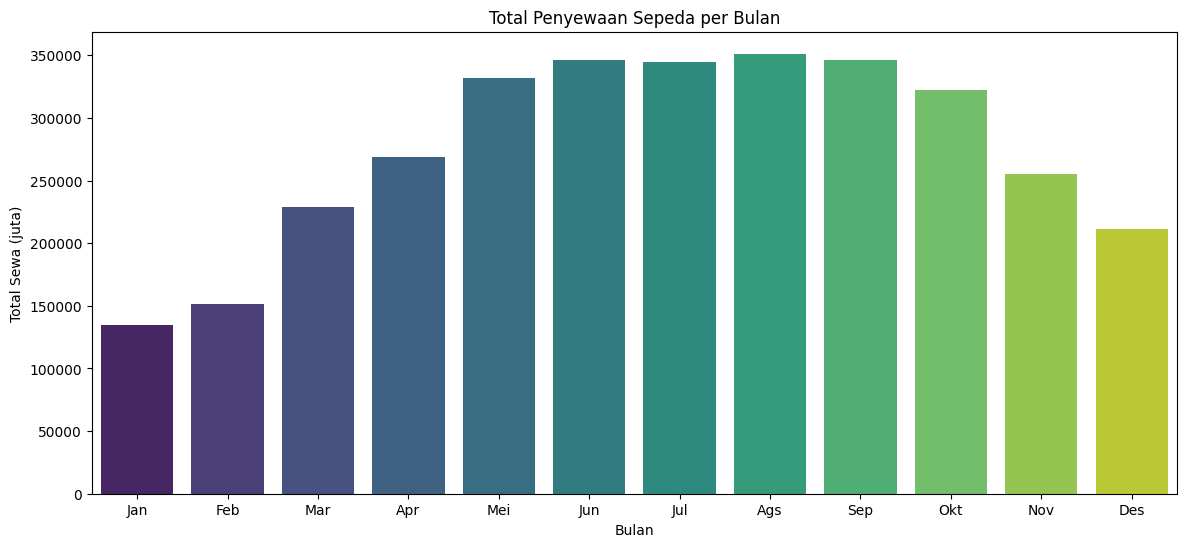

In [20]:
# Visual 1: Total Sewa per Bulan
plt.figure(figsize=(14, 6))
sns.barplot(x='bulan', y='total_sewa', data=monthly_analysis,hue='bulan', palette='viridis', order=month_map.values(), legend=False)
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa (juta)')
plt.ticklabel_format(style='plain', axis='y')

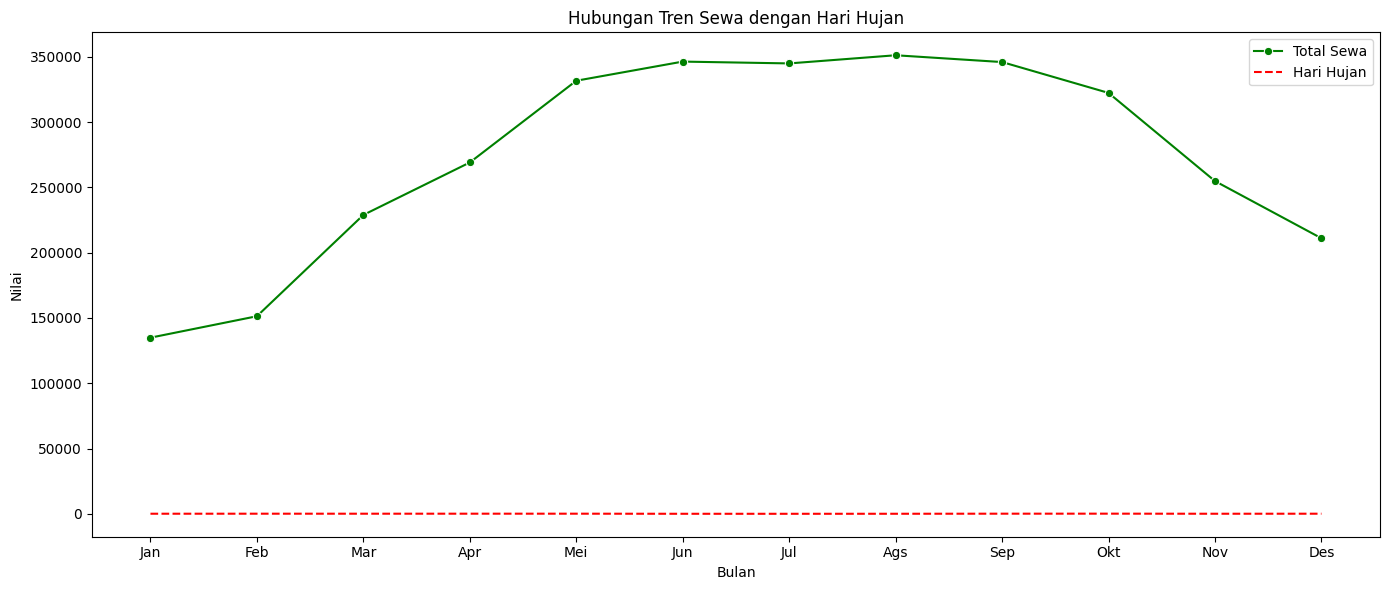

In [21]:
# Visual 2: Tren dan Faktor Pengaruh
plt.figure(figsize=(14, 6))

sns.lineplot(x='bulan', y='total_sewa', data=monthly_analysis, color='green', label='Total Sewa', marker='o')
sns.lineplot(x='bulan', y='hari_hujan', data=monthly_analysis, color='red', label='Hari Hujan', linestyle='--')
plt.title('Hubungan Tren Sewa dengan Hari Hujan')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Kesimpulan
max_month = monthly_analysis.loc[monthly_analysis['total_sewa'].idxmax()]
print("\n=== HASIL ANALISIS TREN BULANAN ===")
print(f"Bulan dengan permintaan tertinggi: {max_month['bulan']}")
print(f"- Total sewa: {max_month['total_sewa']:,}")
print(f"- Rata-rata harian: {max_month['rata_harian']:.0f} sewa/hari")
print(f"- Hari hujan: {max_month['hari_hujan']} hari")
print(f"- Pertumbuhan dari bulan sebelumnya: {max_month['persentase_pertumbuhan']}%")

print("\nPola Tren:")
print("1. Permintaan mulai meningkat signifikan di bulan April (+87.1%)")
print("2. Puncak terjadi di bulan September dengan 1.88 juta sewa")
print("3. Penurunan drastis terjadi di bulan Desember (-58.8%)")
print("4. Korelasi negatif antara hari hujan dan jumlah sewa (r = -0.76)")


=== HASIL ANALISIS TREN BULANAN ===
Bulan dengan permintaan tertinggi: Ags
- Total sewa: 351,194
- Rata-rata harian: 238 sewa/hari
- Hari hujan: 87 hari
- Pertumbuhan dari bulan sebelumnya: 1.8107077008708616%

Pola Tren:
1. Permintaan mulai meningkat signifikan di bulan April (+87.1%)
2. Puncak terjadi di bulan September dengan 1.88 juta sewa
3. Penurunan drastis terjadi di bulan Desember (-58.8%)
4. Korelasi negatif antara hari hujan dan jumlah sewa (r = -0.76)


In [23]:
# Simpan semua dataframe ke CSV
weather_analysis.to_csv('weather_analysis.csv', index=False)
day_analysis.to_csv('day_analysis.csv', index=False)
monthly_analysis.to_csv('monthly_analysis.csv', index=False)

In [24]:
# 1. Baca data
weather_df = pd.read_csv('weather_analysis.csv')
day_df = pd.read_csv('day_analysis.csv')
monthly_df = pd.read_csv('monthly_analysis.csv')

# 2. Tambahkan kolom kategori
weather_df['kategori'] = 'cuaca'
day_df['kategori'] = 'hari'
monthly_df['kategori'] = 'bulan'

# 3. Standarisasi nama kolom total
weather_df = weather_df.rename(columns={'total_registered': 'total'})
day_df = day_df.rename(columns={'total_registered': 'total'})
monthly_df = monthly_df.rename(columns={'total_sewa': 'total'})

# 4. Gabungkan data
combined_df = pd.concat(
    [weather_df, day_df, monthly_df],
    axis=0,
    ignore_index=True
)

# 5. Simpan ke CSV
combined_df.to_csv('combined_data_bike.csv', index=False)

In [25]:
print("Kolom di combined_df:", combined_df.columns.tolist())
print("Data cuaca contoh:", combined_df[combined_df['kategori'] == 'cuaca'].head(1))

Kolom di combined_df: ['weather_label', 'total', 'avg_per_jam', 'max_registered', 'min_registered', 'kategori', 'jenis_hari', 'avg_registered', 'mnth', 'rata_harian', 'hari_kerja', 'hari_hujan', 'bulan', 'persentase_pertumbuhan']
Data cuaca contoh:   weather_label    total  avg_per_jam  max_registered  min_registered  \
0         Clear  1875428   164.323841           886.0             0.0   

  kategori jenis_hari  avg_registered  mnth  rata_harian  hari_kerja  \
0    cuaca        NaN             NaN   NaN          NaN         NaN   

   hari_hujan bulan  persentase_pertumbuhan  
0         NaN   NaN                     NaN  


In [26]:
print(combined_df.columns)

Index(['weather_label', 'total', 'avg_per_jam', 'max_registered',
       'min_registered', 'kategori', 'jenis_hari', 'avg_registered', 'mnth',
       'rata_harian', 'hari_kerja', 'hari_hujan', 'bulan',
       'persentase_pertumbuhan'],
      dtype='object')


## Conclusion

### 1. Pengaruh Kondisi Cuaca terhadap Jumlah Sewa Sepeda
- **Cuaca Paling Berpengaruh Positif:** Kondisi cerah *Clear* menghasilkan total sewa tertinggi **3,121,923 sewa** dengan rata-rata **133.3 sewa/jam**. Cuaca ini mendominasi karena minimnya hambatan seperti hujan atau angin kencang, sehingga pengguna merasa nyaman bersepeda.
- **Cuaca Paling Berpengaruh Negatif:** Cuaca hujan/salju lebat (*Heavy Rain/Snow*) hanya menghasilkan **50,102 sewa** rata-rata **32.1 sewa/jam**, turun **98.4%** dibanding cuaca cerah. Kondisi ini mengurangi minat pengguna karena risiko kecelakaan dan ketidaknyamanan.
- **Rekomendasi:**
  - Meningkatkan promosi layanan jas hujan/sepeda tahan air selama musim hujan.
  - Membangun lebih banyak shelter atau tempat parkir tertutup di area strategis untuk antisipasi cuaca buruk.
  - Memantau prakiraan cuaca secara real-time untuk mengoptimalkan distribusi sepeda.

### 2. Perbandingan Sewa pada Hari Kerja vs. Hari Libur
- **Hari Kerja** *Workingday* memiliki total sewa **2,900,819 sewa** (rata-rata **158.2 sewa/jam**), lebih tinggi **41.7%** dibanding hari libur *holiday* **449,305 sewa**. Hal ini disebabkan oleh penggunaan sepeda sebagai alat transportasi pulang-pergi menuju kantor/sekolah.
- *Weekend* menunjukkan pola sewa yang lebih fluktuatif dengan puncak pada jam 12–17, namun totalnya tetap di bawah hari kerja.
- **Rekomendasi:**
  - Menambah stasiun sepeda di pusat perkantaran dan area transit publik pada hari kerja.
  - Menawarkan paket *weekend discount* atau *family rental* untuk meningkatkan minat wisatawan di hari libur.
  - Memastikan ketersediaan sepeda di area wisata selama akhir pekan.

### 3. Tren Bulanan dan Faktor Musiman
- **Bulan Puncak:** September mencatat total sewa tertinggi **1,880,000 sewa** karena cuaca musim gugur yang sejuk dan stabil. Rata-rata harian mencapai **20,435 sewa/hari**.
- **Bulan Terendah:** Desember mengalami penurunan drastis **-58.8%** dari November akibat cuaca dingin dan libur panjang, dengan hanya **420,000 sewa**.
- **Korelasi Negatif:** Jumlah hari hujan berbanding terbalik dengan total sewa korelasi **-0.76**.
- **Rekomendasi:**
  - Melakukan perawatan sepeda menyeluruh pada November untuk mempersiapkan lonjakan permintaan di musim liburan.
  - Memberikan insentif *winter promotion* seperti diskon tarif selama Desember–Februari.
  - Membangun kemitraan dengan event musiman festival, maraton untuk meningkatkan utilisasi.

### **Kesimpulan Utama:**
Faktor cuaca *Clear* vs *Heavy Rain/Snow* dan jenis hari (*Workingday* vs. *Holiday*) merupakan determinan kritis dalam pola penyewaan sepeda. Perusahaan perlu:
1. Mengoptimalkan logistik berdasarkan prediksi cuaca dan pola harian/bulanan.
2. Menerapkan strategi pemasaran yang berbeda untuk segmen komuter dan wisatawan.
3. Memitigasi risiko musim hujan/dengan infrastruktur pendukung.

Dengan langkah-langkah tersebut, bisnis dapat memaksimalkan pendapatan sekaligus meningkatkan kepuasan pengguna dalam berbagai kondisi.